#Name: Dhruvi Shah
#Student ID : 202211032
#AML Lab:5

Bayes' Theorem states that the conditional probability of an event, based on the occurrence of another event, is equal to the likelihood of the second event given the first event multiplied by the probability of the first event. The formula in plain English is:

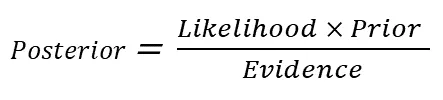

This can also be given by the following formula :

p(θ|D) = p(θ)p(D|θ)/p(D)

**Bayesian Model Averaging**: It is a statistical approach used to combine multiple statistical models to improve the accuracy of predictions or estimates.

The idea behind BMA is to account for model uncertainty by weighting the 

*  The idea behind BMA is to account for model uncertainty by weighting the predictions of each model by its posterior probability. The posterior probability of a model is the probability of the model given the data, and it can be calculated using Bayes' theorem.
*   BMA involves selecting a set of candidate models that may be appropriate for a given problem, estimating the posterior probability of each model based on the available data, and combining the predictions of the models using their respective posterior probabilities as weights.
*   The advantage of BMA is that it can handle model uncertainty and provide a more reliable and accurate estimate or prediction than any single model.


Importing important libraries

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
from jax.scipy.stats import beta, bernoulli

In [ ]:
# Points where we evaluate the pdf
x = jnp.linspace(0.001, 0.999, 100)

**Explaination for priors, likelihood and posteriors** :
Prior Distribution: The prior distribution represents our initial beliefs or assumptions about the probability distribution of the parameter(s) of interest before we observe any data. It is often based on expert knowledge or previous studies.

Likelihood Distribution: The likelihood distribution represents the probability of observing the data given a specific value of the parameter(s). It is calculated using the statistical model that describes the data generating process.

Posterior Distribution: The posterior distribution represents the updated beliefs or assumptions about the probability distribution of the parameter(s) after observing the data. It is calculated using Bayes' theorem, which combines the prior distribution and the likelihood distribution.

#Beta-Bernuolli model

In [ ]:
# Forms graph given the parameters of the prior, likelihood and posterior:
def make_graph(data, save_name):
    prior = beta.pdf(x, a=data["prior"]["a"], b=data["prior"]["b"])
    n_0 = data["likelihood"]["n_0"]
    n_1 = data["likelihood"]["n_1"]
    samples = jnp.concatenate([jnp.zeros(n_0), jnp.ones(n_1)])
    likelihood_function = jnp.vectorize(lambda p: jnp.exp(bernoulli.logpmf(samples, p).sum()))
    likelihood = likelihood_function(x)
    posterior = beta.pdf(x, a=data["posterior"]["a"], b=data["posterior"]["b"])

    fig, ax = plt.subplots()
    axt = ax.twinx()
    fig1 = ax.plot(
        x,
        prior,
        "k",
        label=f"prior Beta({data['prior']['a']}, {data['prior']['b']})",
        linewidth=2.0,
    )
    fig2 = axt.plot(x, likelihood, "r:", label=f"likelihood Bernoulli", linewidth=2.0)
    fig3 = ax.plot(
        x,
        posterior,
        "b-.",
        label=f"posterior Beta({data['posterior']['a']}, {data['posterior']['b']})",
        linewidth=2.0,
    )
    fig_list = fig1 + fig2 + fig3
    labels = [fig.get_label() for fig in fig_list]
    ax.legend(fig_list, labels, loc="upper left", shadow=True)
    axt.set_ylabel("Likelihood")
    ax.set_ylabel("Prior/Posterior")
    ax.set_title(f"$N_0$:{n_0}, $N_1$:{n_1}")
    pml.savefig(save_name)

The above function of make graph takes in two parameters : data and save_name, a string specifying the name of the file to which the graph will be saved.


*   Here we define the beta-bernuolli model as beta and bernuolli are conjugate of each other.
 
*   The prior is chosen from beta distribution.

*  n0 and n1 defines the success and failure respectively.

*  This line creates a NumPy array samples with n_0 zeros followed by n_1 ones. This array is used to calculate the likelihood function.

*   The samples are generated using jnp.concatenate([jnp.zeros(n_0), jnp.ones(n_1)]), which concatenates n_0 zeros and n_1 ones to create the array of samples
*   Then the likelihood function  is created for the Beta-Bernoulli model. The likelihood_function is a vectorized function that takes in a probability p and returns the likelihood of the data given that probability. The x array is used as the input to the function. The likelihood array is the result of applying the likelihood_function to the x array.

* For the first figure plot the fig object is the entire figure, while ax and axtare two separate axes objects that share the same x-axis. ax is used to plot the prior and posterior distributions, while axt is used to plot the likelihood function.

- Then the prior distribution is plotted on the ax object. The x array is used as the x-axis, the prior array is used as the y-axis.

- Then the likelihood function is plotted on the axt object. The x array is used as the x-axis, the likelihood array is used as the y-axis.
- Lastly, posterior distribution is plotted in the similar way as prior.



For plotting the 3 distributions in the same graph :The prior distribution is plotted first, representing our initial beliefs about the parameter(s) before we observe any data. The shape of the prior distribution will depend on our assumptions and knowledge about the parameter(s).
The likelihood distribution is then plotted on the same graph, representing the probability of observing the data given a specific value of the parameter(s). The shape of the likelihood distribution will depend on the statistical model used to describe the data generating process.
Finally, the posterior distribution is plotted on the same graph, representing the updated beliefs about the parameter(s) after observing the data. The shape of the posterior distribution is a combination of the prior distribution and the likelihood distribution.
By visualizing these distributions on the same graph, we can see how the data has updated our beliefs about the parameter(s). For example, if the prior distribution is very wide and the likelihood distribution is narrow, the posterior distribution will be narrower than the prior distribution, indicating that the data has provided more precise information about the parameter(s).Hence, it can help us understand the impact of the data on our beliefs about the parameter(s) and how the different probability distributions interact with each other.

**When value of a and b is 1 is a straight horizontal line.**

/usr/local/lib/python3.9/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


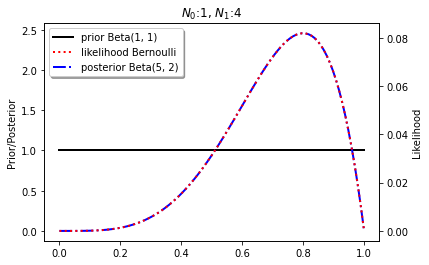

In [ ]:
data1 = {
    "prior": {"a": 1, "b": 1},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 5, "b": 2},
}
make_graph(data1, "betaPostUninfSmallSample.pdf")

**As the value of a and b increases in beta distribution the curve becomes narrower(shown by blue line).**

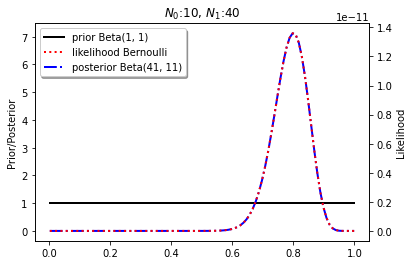

In [ ]:
data2 = {
    "prior": {"a": 1, "b": 1},
    "likelihood": {"n_0": 10, "n_1": 40},
    "posterior": {"a": 41, "b": 11},
}
make_graph(data2, "betaPostUninfLargeSample.pdf")

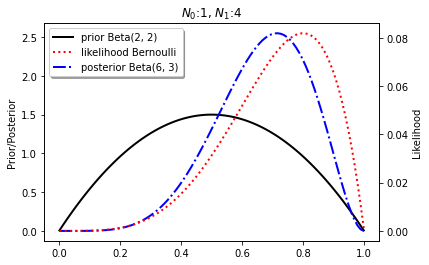

In [ ]:
data3 = {
    "prior": {"a": 2, "b": 2},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 6, "b": 3},
}
make_graph(data3, "betaPostInfSmallSample.pdf")

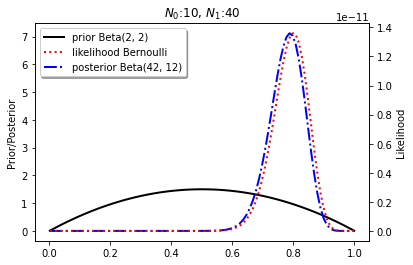

In [ ]:
data4 = {
    "prior": {"a": 2, "b": 2},
    "likelihood": {"n_0": 10, "n_1": 40},
    "posterior": {"a": 42, "b": 12},
}
make_graph(data4, "betaPostInfLargeSample.pdf")

#Firstly trying for different values of a and b for prior probability having beta distribution

**When a=1 and b=1 it is a straight horizontal line for prior distribution shown in black color.**

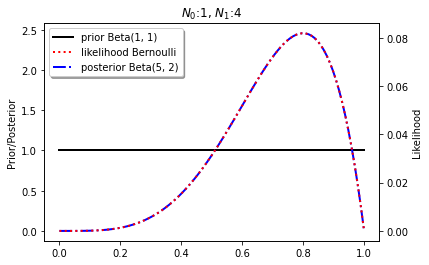

In [ ]:
data1 = {
    "prior": {"a": 1, "b": 1},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 5, "b": 2},
}
make_graph(data1, "betaPostUninfSmallSample1
.pdf")

**When one of a or b is 1 then too is straight line either with increasing or decreasing slope. (a-> greater then increasing slope).**

/usr/local/lib/python3.9/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


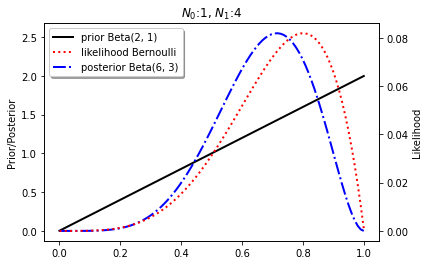

In [ ]:
data12 = {
    "prior": {"a": 2, "b": 1},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 6, "b": 3},
}
make_graph(data12, "betaPostUninfSmallSample1.pdf")

**when a and b are large and nearly equal then it follows normal distribution.**

/usr/local/lib/python3.9/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


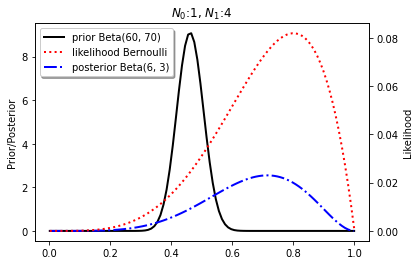

In [ ]:
data14 = {
    "prior": {"a": 60, "b": 70},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 6, "b": 3},
}
make_graph(data14, "betaPostUninfSmallSample1.pdf")

**When a and b are equal beta distribution has a shape as under(semicircle)**

/usr/local/lib/python3.9/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


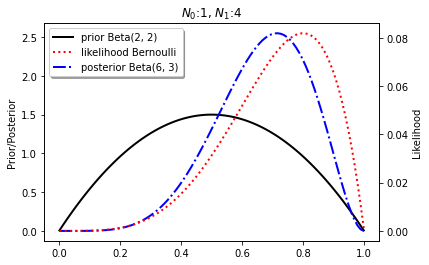

In [ ]:
data11 = {
    "prior": {"a": 2, "b": 2},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 6, "b": 3},
}
make_graph(data11, "betaPostUninfSmallSample1.pdf")

**For the value less then 1 for a and b we obtain a u shaped curve**

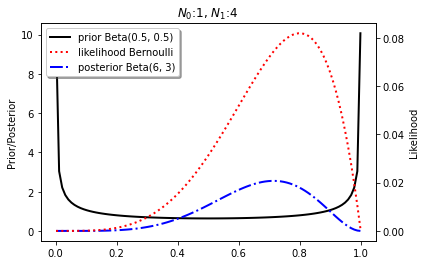

In [ ]:
data15 = {
    "prior": {"a": 0.5, "b": 0.5},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 6, "b": 3},
}
make_graph(data15, "betaPostUninfSmallSample1.pdf")

#Similarly for the posterior we have beta distribution and it follows the same rules for curve as shown above few of which is as shown below with the blue dotted line

**When 1 of a or b is less 1 then it is not a full U-shaped curve as shown below:**

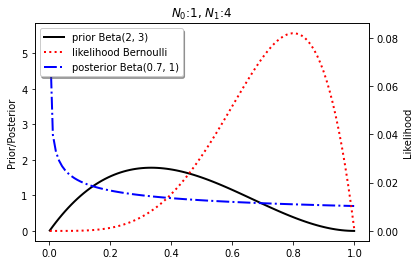

In [ ]:
data16 = {
    "prior": {"a": 2, "b": 3},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 0.7, "b": 1},
}
make_graph(data16, "betaPostUninfSmallSample1.pdf")

**As b increases failure rate increases so curve is shifted towards left.**

/usr/local/lib/python3.9/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


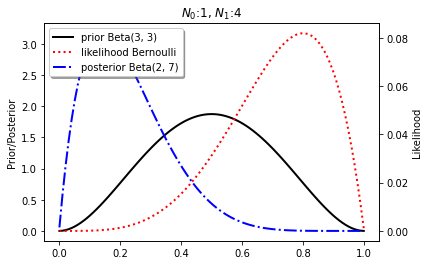

In [ ]:
data17 = {
    "prior": {"a": 3, "b": 3},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 2, "b": 7},
}
make_graph(data17, "betaPostUninfSmallSample1.pdf")

**As 'a' increases success rate increases so curve is shifted towards right.**

/usr/local/lib/python3.9/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


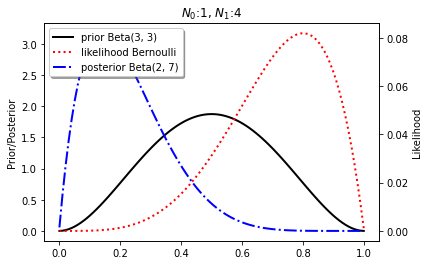

In [ ]:
data18 = {
    "prior": {"a": 3, "b": 3},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 2, "b": 7},
}
make_graph(data18, "betaPostUninfSmallSample1.pdf")

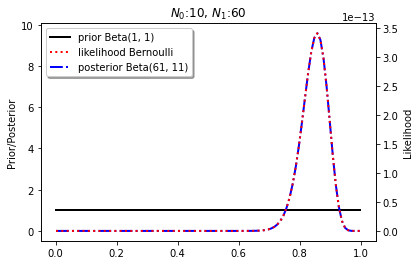

In [ ]:
data2 = {
    "prior": {"a": 1, "b": 1},
    "likelihood": {"n_0": 10, "n_1": 60},
    "posterior": {"a": 61, "b": 11},
}
make_graph(data2, "betaPostUninfLargeSample.pdf")

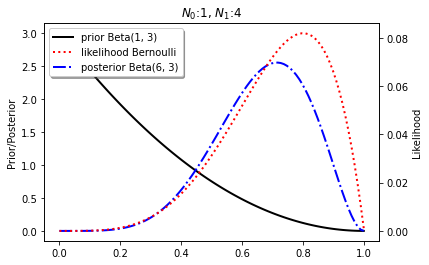

In [ ]:
data3 = {
    "prior": {"a": 1, "b": 3},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 6, "b": 3},
}
make_graph(data3, "betaPostInfSmallSample.pdf")

In [ ]:
data4 = {
    "prior": {"a": 2, "b": 2},
    "likelihood": {"n_0": 10, "n_1": 40},
    "posterior": {"a": 42, "b": 12},
}
make_graph(data4, "betaPostInfLargeSample.pdf")


plt.show()

#Beta-Binomial model

In [ ]:
from scipy.stats import beta, binom
import matplotlib.pyplot as plt
import numpy as np

def make_graph(data, save_name):
    x = np.linspace(0, 1, 200)
    
    prior = beta.pdf(x, a=data["prior"]["a"], b=data["prior"]["b"])
    
    n = data["likelihood"]["n"]
    k = data["likelihood"]["k"]
    likelihood = binom.pmf(k, n, x)
    
    posterior = beta.pdf(x, a=data["posterior"]["a"], b=data["posterior"]["b"])
    
    fig, ax = plt.subplots()
    axt = ax.twinx()
    fig1 = ax.plot(
        x,
        prior,
        "k",
        label=f"prior Beta({data['prior']['a']}, {data['prior']['b']})",
        linewidth=2.0,
    )
    fig2 = axt.plot(x, likelihood, "r:", label=f"likelihood Binomial(n={n}, k={k})", linewidth=2.0)
    fig3 = ax.plot(
        x,
        posterior,
        "b-.",
        label=f"posterior Beta({data['posterior']['a']}, {data['posterior']['b']})",
        linewidth=2.0,
    )
    fig_list = fig1 + fig2 + fig3
    labels = [fig.get_label() for fig in fig_list]
    ax.legend(fig_list, labels, loc="upper left", shadow=True)
    axt.set_ylabel("Likelihood")
    ax.set_ylabel("Prior/Posterior")
    ax.set_title(f"n={n}, k={k}")
    plt.savefig(save_name)

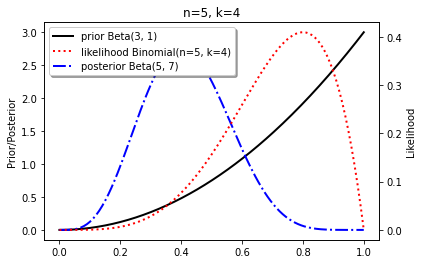

In [ ]:
data41 = {
    "prior": {"a": 3, "b": 1},
    "likelihood": {"n": 5, "k": 4},
    "posterior": {"a": 5, "b": 7},
}
make_graph(data41, "betaBinPost.pdf")

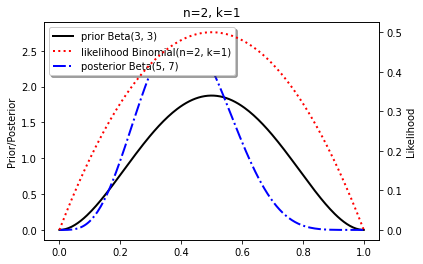

In [ ]:
data42 = {
    "prior": {"a": 3, "b": 3},
    "likelihood": {"n": 2, "k": 1},
    "posterior": {"a": 5, "b": 7},
}
make_graph(data42, "betaBinPost.pdf")

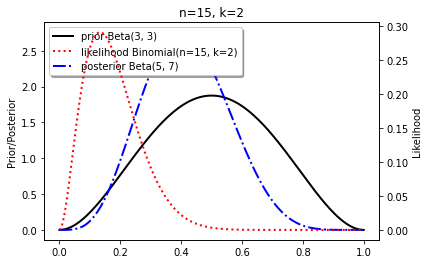

In [ ]:
data43 = {
    "prior": {"a": 3, "b": 3},
    "likelihood": {"n": 15, "k": 2},
    "posterior": {"a": 5, "b": 7},
}
make_graph(data43, "betaBinPost.pdf")

**Insights for the binomial distribution(likelihood following this distribution):**
-  n ,p large: When both n and p are large, the binomial distribution is also approximately normal, with a mean of np and a standard deviation of sqrt(np(1-p)). The curve is symmetric, with most of the values concentrated around the mean. As the value of k moves away from the mean, the curve becomes less dense.
- n is large and p is small: When n is large and p is small, the binomial distribution is approximately normal, with a mean of np and a standard deviation of sqrt(np(1-p)). The curve is symmetric, with most of the values concentrated around the mean. As the value of k moves away from the mean, the curve becomes less dense.
- n is small and p is large: When n is small and p is large, the binomial distribution is skewed to the left, with most of the values clustered towards the upper end of the distribution. As the value of k increases, the curve becomes less skewed and approaches a normal distribution. This is because as the probability of success increases, the distribution becomes more symmetrical and the impact of the number of trials becomes less pronounced.
-n is small and p is small: When both n and p are small, the binomial distribution is skewed to the right, and the majority of the values are near zero. As the value of k increases, the curve becomes less skewed and approaches a normal distribution. This is because as the number of trials increases, the distribution becomes more symmetrical and the impact of the probability of success becomes less pronounced

**Conjugate priors** :A prior p(θ) ∈ F is a conjugate prior for a likelihood function p(D|θ) if the posterior is in the
same parameterized family as the prior, i.e., p(θ|D) ∈ F
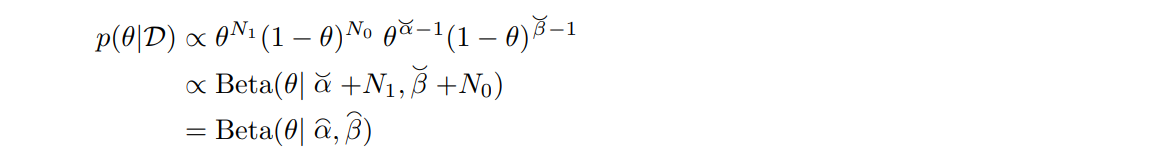

- Similarly,Beta prior is also a conjugate of binomial likelihood beacuse the scaling factor is independent of θ.
- Normal prior is conjugate of normal likelihood.
- Gamma prior is conjugate of poisson likelihood.